# Principal Component Analysis (PCA)

In [1]:
# First we will import the nessesary libraries
import pandas as pd
import numpy as np


### Load the data required dataset
###### Uplaod dataset from local device

In [2]:
data= pd.read_csv("C:\\Users\\HP\\Desktop\\M.Sc Project\\Model Selected data(Positive and Negative).csv")

In [3]:
data.head()

,CRP mg/L,LDH U/L,Platelet Count 10^3/Î¼L,Neutrophils %,Lymphocytes %,Monocytes %,Eosinophils %,Basophils %,SGPT (ALT) U/L,Gamma GT U/L,Urea mg/dL,Total Leucocytes 10^3/Î¼L,Result
0,1.10,158.0,266.0,90.0,8.0,2.0,0.0,0.0,15.0,30.145161,23.00,10900.0,1
1,3.31,532.4,322.0,57.5,29.6,9.8,2.4,0.7,37.5,23.700000,22.49,8200.0,1
2,18.50,234.0,231.0,61.0,24.0,3.0,14.0,0.3,47.0,37.000000,21.00,7120.0,1
3,1.93,286.2,258.0,62.6,28.2,6.7,2.1,0.4,26.9,19.700000,34.50,7800.0,1
4,1.48,306.0,299.0,59.0,27.0,9.0,5.0,0.0,40.0,30.145161,18.00,9100.0,1


###### On this dataset we will perform PCA 

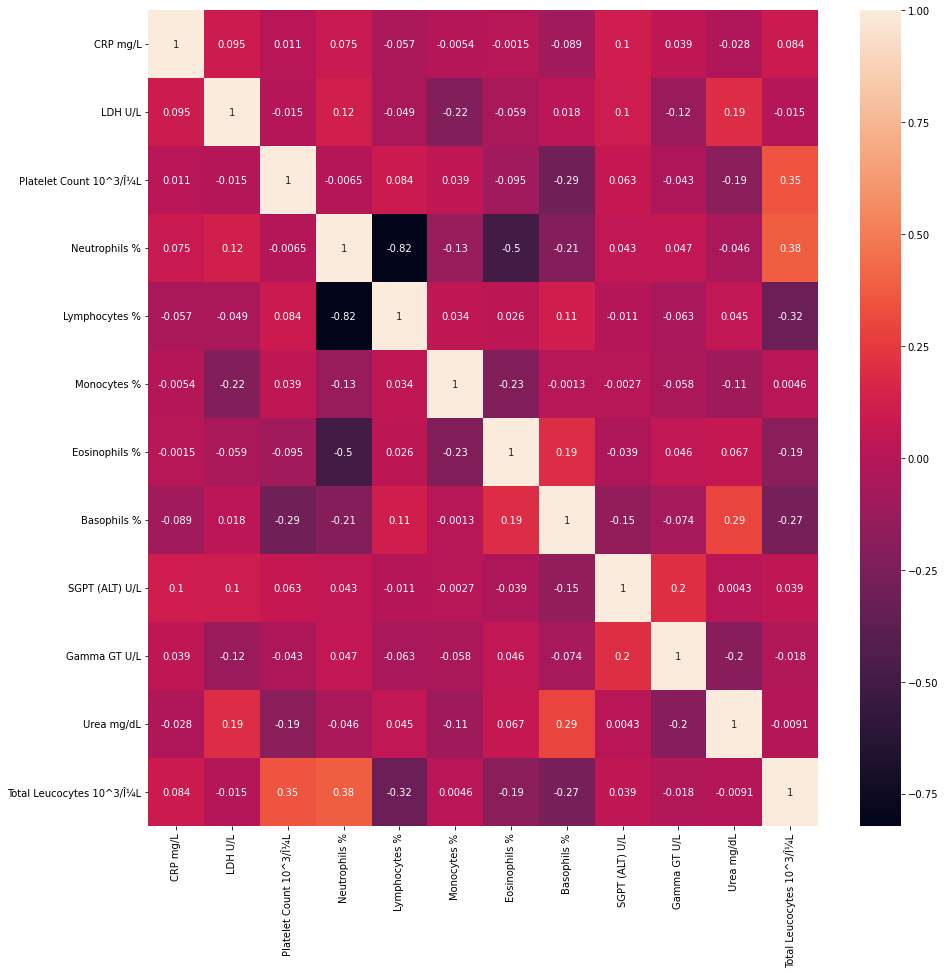

In [5]:
# First we will check for correlation between these variables
import seaborn as sns
import matplotlib.pyplot as plt
X= data.drop(['Result'], axis=1)
fig = plt.figure(figsize=(15, 15))
sns.heatmap(X.corr(), annot=True)
plt.savefig("Heatmap.png")

### Conclusion: 
###### We observed that, there is absence high degree of correlation between predictor  variables

In [6]:
# Impliment feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [7]:
# Apply PCA on Scaled data
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
pca.fit(X_scaled)

PCA()

In [8]:
# Extract the eigenvalues
print("Eigenvalues:")
print(pca.explained_variance_)

Eigenvalues:
[2.43677139 1.65013629 1.32524031 1.27557546 1.10074991 0.95443612
 0.89679457 0.71963771 0.66168318 0.57390238 0.46199505 0.02361453]


In [11]:
# Get explained variances by each principal component
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()
m=np.cumsum(pca.explained_variance_ratio_ * 100)
print("Cumulative % of Variation : \n",m)


Variances (Percentage):
[20.17105209 13.65946152 10.97004481 10.55893022  9.11176314  7.90061008
  7.42346618  5.95700108  5.47726634  4.7506364   3.82429232  0.19547583]

Cumulative % of Variation : 
 [ 20.17105209  33.8305136   44.80055841  55.35948863  64.47125176
  72.37186184  79.79532802  85.7523291   91.22959545  95.98023185
  99.80452417 100.        ]


Text(0, 0.5, 'Explained variance (%)')

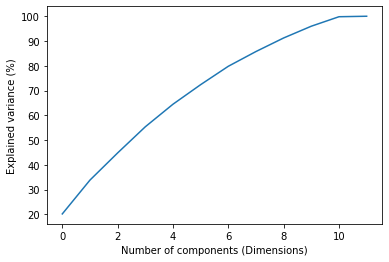

In [10]:
# Make the scree plot
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components (Dimensions)")
plt.ylabel("Explained variance (%)")

#### From above we observed that first 9 Principal component explanied more than 90% of variance

In [12]:
# Now we will extract only first 9 principal components
from sklearn.decomposition import PCA
pca = PCA(n_components=9)
X_pca = pca.fit_transform(X_scaled)

# Transformed these Principal Components into a dataset
X_pca = pd.DataFrame(X_pca)

In [13]:
X_pca

,0,1,2,3,4,5,6,7,8
0,-2.663175,0.511049,-0.698616,0.882117,1.552648,-0.603355,-0.363301,0.102532,1.085454
1,0.353802,-0.477226,-0.458426,-1.174145,-1.120338,-0.599611,0.071966,-0.603239,-1.919234
2,0.238200,-0.199282,2.141866,-0.158895,-0.094172,1.645950,-0.050169,-0.810566,0.727821
3,0.443895,0.320088,-0.876792,-0.471830,-0.392590,-0.589482,0.629991,0.105729,0.480523
4,-0.413140,-1.740172,-0.089025,-0.305937,-0.279595,-0.640171,0.088369,-1.250706,-0.188462
...,...,...,...,...,...,...,...,...,...
145,-1.736205,2.699578,-0.279863,1.454836,0.077857,-0.653712,-0.949393,-0.427484,0.642274
146,-0.208821,1.761337,-0.481531,2.955656,-1.140389,0.293251,-0.710788,-0.396904,0.330935
147,-2.068884,-2.272305,-0.632814,-0.099959,0.587983,-0.189564,0.622532,-0.538948,-0.983315
148,-2.685631,0.352197,-1.879469,-0.193702,1.129600,0.404958,1.699546,0.537594,0.554964


#### As we know that each principal component is independent of each other 
#### Now let's verify it?

<AxesSubplot:>

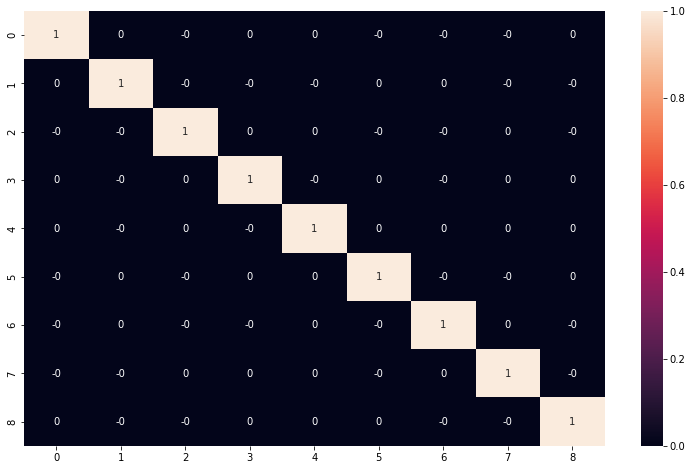

In [15]:
fig = plt.figure(figsize=(13, 8))
sns.heatmap(round(X_pca.corr(),2),annot=True)